# Zestaw 1 Arytmetyka komputerowa

## Zadanie 1
### Porównać w języku Julia reprezentację bitową liczby 1/3 dla Float16, Float32, Float64 oraz liczby, która jest inicjalizowana jako Float16, a potem rzutowana na Float64.

In [1]:
f16 = Float16(1.0 / 3)
f32 = Float32(1.0 / 3)
f64 = Float64(1.0 / 3)
f16to64 = convert(Float64, f16)

println("General representation:\n")
bit16 = bitstring(f16)
println(bit16)
bit32 = bitstring(f32)
println(bit32)
bit64 = bitstring(f64)
println(bit64)
bit16to64 = bitstring(f16to64)
println(bit16to64)

println("\nDivided into parts:\n")
println(bit16[1:1], "\t", bit16[2:6], "\t\t", bit16[7:16])
println(bit32[1:1], "\t", bit32[2:9], "\t", bit32[10:32])
println(bit64[1:1], "\t", bit64[2:12], "\t", bit64[13:64])
println(bit16to64[1:1], "\t", bit16to64[2:12], "\t", bit16to64[13:64])

General representation:

0011010101010101
00111110101010101010101010101011
0011111111010101010101010101010101010101010101010101010101010101
0011111111010101010101000000000000000000000000000000000000000000

Divided into parts:

0	01101		0101010101
0	01111101	01010101010101010101011
0	01111111101	0101010101010101010101010101010101010101010101010101
0	01111111101	0101010101000000000000000000000000000000000000000000


<b> Widać przy konwersji utratę precyzji - liczba 1/3 (o nieskończonym rozwinięciu dwójkowym) zapisana jako 16 bitowa staje się liczbą 0.333251953125, którą da się zareprezentować dokładniej na 64 bitach. </b>

## Zadanie 2
### Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi reprezentowanymi w komputerze za pomocą języka Julia. Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu od 1.0 do 1000000.0.




In [2]:
function precision_change(start, stop, exponential=true, step=2)
    xs = Float32[]
    ys = Float32[]
    ii = start
    
    while ii <= stop
        push!(xs, ii)
        push!(ys, nextfloat(ii) - ii)
        if (exponential == true)
            ii *= step
        else
            ii += step
        end
    end
    n = length(xs)
    xs, ys
end
""

""

In [3]:
using Plots

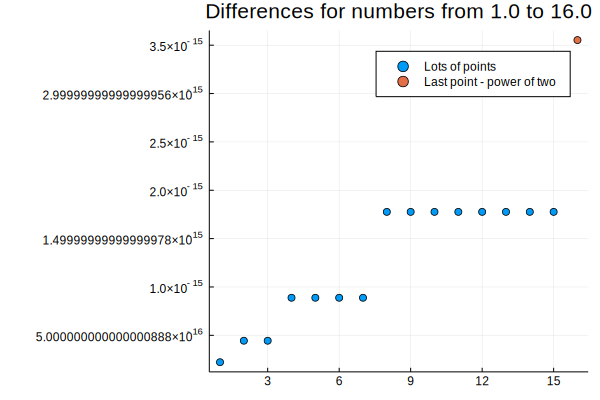

In [4]:
xs, ys = precision_change(1.0, 16.0, false, 1.0)
n = length(xs)
scat = scatter(xs[1:n-1], ys[1:n-1], label = "Lots of points")
scatter!(xs[n:n], ys[n:n], label = "Last point - power of two")
display(plot(scat, title = "Differences for numbers from 1.0 to 16.0"))

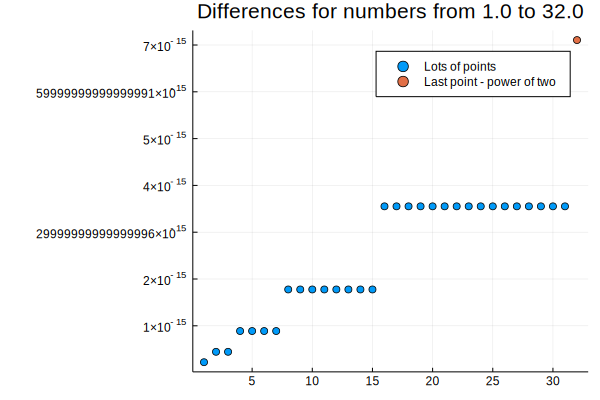

In [5]:
xs, ys = precision_change(1.0, 32.0, false, 1.0)
n = length(xs)
scat = scatter(xs[1:n-1], ys[1:n-1], label = "Lots of points")
scatter!(xs[n:n], ys[n:n], label = "Last point - power of two")
display(plot(scat, title = "Differences for numbers from 1.0 to 32.0"))

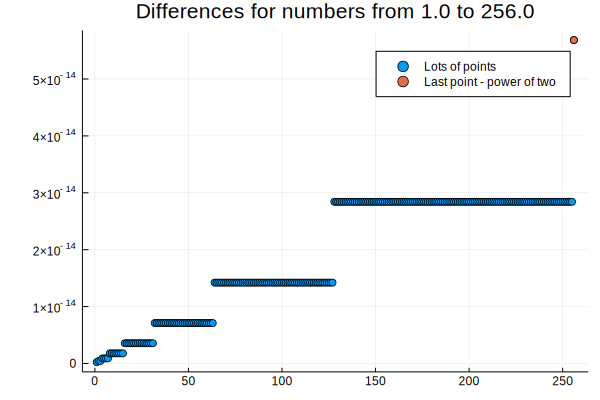

In [6]:
xs, ys = precision_change(1.0, 256.0, false, 1.0)
n = length(xs)
scat = scatter(xs[1:n], ys[1:n], label = "Lots of points")
scatter!(xs[n:n], ys[n:n], label = "Last point - power of two")
display(plot(scat, title = "Differences for numbers from 1.0 to 256.0"))

<b>Poprzez analizę wykresu dla różnych ilości punktów odległych o 1 (16, 32, 256) doszedłem do konkluzji, że wystarczy próbkować kolejne potęgi liczby 2, ponieważ to w ich okolicach następuje zmiana precyzji. Widzimy na powyższych wykresach pojedynczy punkt (ten najbardziej z prawej, zaznaczony na pomarańczowo), przy którym następuje postulowana zmiana precyzji w stosunku do poprzedników. Wartość różnicy tego punktu od nastepnej liczby zmiennoprzecinkowej jest różna niż dla liczb mniejszych (1,000,000 to troszkę dużo[wystarczająco, żeby zawiesić jupytera], więc takimi założeniami ograniczam liczbę próbkowań)</b>

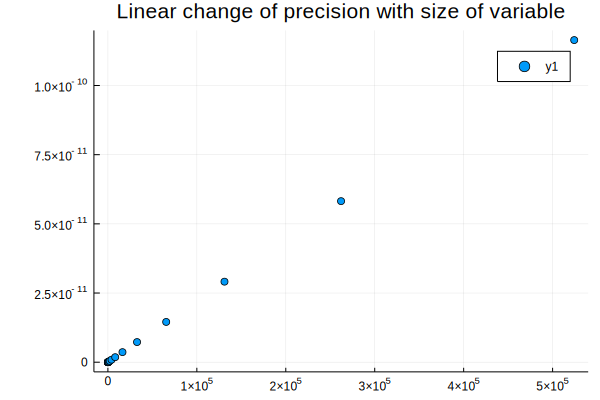

In [7]:
xs, ys = precision_change(1.0, 1.0e6)
scatter(xs, ys, title = "Linear change of precision with size of variable")

<b> Dla porównania wykres ze współrzędną y w skali logarytmicznej. - Przy takim przedstawieniu można mniej więcej odczytać z wykresu rząd wielkości różnic. </b>

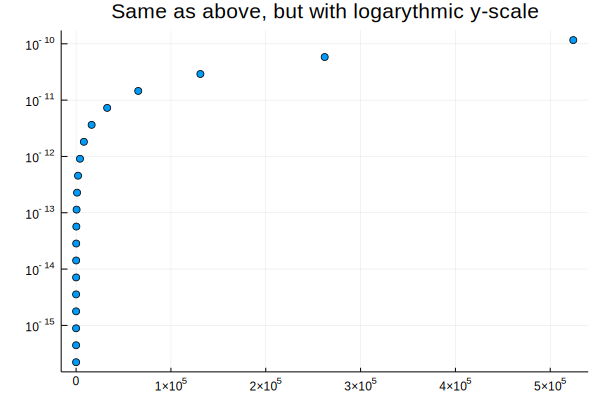

In [8]:
xs, ys = precision_change(1.0, 1.0e6)

scatter(xs, ys, xscale=:identity, yscale=:log10, label = "", title = "Same as above, but with logarythmic y-scale")

## Zadanie 3
### Jedną z bibliotek numerycznych, jaką będziemy używać na zajęciach jest GSL (język C). Korzystając ze wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?


Kod w języku C

```c
/*-
 * Author: Kamil Burkiewicz
 */

#include <gsl/gsl_ieee_utils.h>

#include <stdio.h>

#define rep_float(var) do {                 \
    gsl_ieee_fprintf_float(stdout, &var);   \
    printf("\n");                           \
} while (0);

#define rep_double(var) do {                \
    gsl_ieee_fprintf_double(stdout, &var);  \
    printf("\n");                           \
} while (0);

int
main()
{
    float f = 1.0;
    float f_prev = 2 * f;

    printf(">\tFloat %lu-bits\n\n", 8 * sizeof(f));

    while (f != f_prev) {
        rep_float(f);
        f_prev = f;
        f /= 2;
    }

    double lf = 1.0;
    double lf_prev = 2 * lf;

    printf(">\tDouble %lu-bits\n\n", 8 * sizeof(lf));

    while (lf != lf_prev) {
        rep_double(lf);
        lf_prev = lf;
        lf /= 2;
    }

    return (0);
}

```

Program output:


#### >	Float 32-bits

     1.00000000000000000000000*2^0
     1.00000000000000000000000*2^-1
     1.00000000000000000000000*2^-2
     1.00000000000000000000000*2^-3
     1.00000000000000000000000*2^-4
     1.00000000000000000000000*2^-5
     1.00000000000000000000000*2^-6
     1.00000000000000000000000*2^-7
     1.00000000000000000000000*2^-8
     1.00000000000000000000000*2^-9
     1.00000000000000000000000*2^-10
                 .
                 .
                 .
     1.00000000000000000000000*2^-123
     1.00000000000000000000000*2^-124
     1.00000000000000000000000*2^-125
     1.00000000000000000000000*2^-126
     0.10000000000000000000000*2^-126
     0.01000000000000000000000*2^-126
     0.00100000000000000000000*2^-126
     0.00010000000000000000000*2^-126
     0.00001000000000000000000*2^-126
     0.00000100000000000000000*2^-126
     0.00000010000000000000000*2^-126
     0.00000001000000000000000*2^-126
     0.00000000100000000000000*2^-126
     0.00000000010000000000000*2^-126
     0.00000000001000000000000*2^-126
     0.00000000000100000000000*2^-126
     0.00000000000010000000000*2^-126
     0.00000000000001000000000*2^-126
     0.00000000000000100000000*2^-126
     0.00000000000000010000000*2^-126
     0.00000000000000001000000*2^-126
     0.00000000000000000100000*2^-126
     0.00000000000000000010000*2^-126
     0.00000000000000000001000*2^-126
     0.00000000000000000000100*2^-126
     0.00000000000000000000010*2^-126
     0.00000000000000000000001*2^-126
     0

#### >	Double 64-bits

     1.0000000000000000000000000000000000000000000000000000*2^0
     1.0000000000000000000000000000000000000000000000000000*2^-1
     1.0000000000000000000000000000000000000000000000000000*2^-2
     1.0000000000000000000000000000000000000000000000000000*2^-3
     1.0000000000000000000000000000000000000000000000000000*2^-4
     1.0000000000000000000000000000000000000000000000000000*2^-5
     1.0000000000000000000000000000000000000000000000000000*2^-6
     1.0000000000000000000000000000000000000000000000000000*2^-7
     1.0000000000000000000000000000000000000000000000000000*2^-8
     1.0000000000000000000000000000000000000000000000000000*2^-9
     1.0000000000000000000000000000000000000000000000000000*2^-10
                                 .
                                 .
                                 .
     1.0000000000000000000000000000000000000000000000000000*2^-1019
     1.0000000000000000000000000000000000000000000000000000*2^-1020
     1.0000000000000000000000000000000000000000000000000000*2^-1021
     1.0000000000000000000000000000000000000000000000000000*2^-1022
     0.1000000000000000000000000000000000000000000000000000*2^-1022
     0.0100000000000000000000000000000000000000000000000000*2^-1022
     0.0010000000000000000000000000000000000000000000000000*2^-1022
     0.0001000000000000000000000000000000000000000000000000*2^-1022
     0.0000100000000000000000000000000000000000000000000000*2^-1022
     0.0000010000000000000000000000000000000000000000000000*2^-1022
     0.0000001000000000000000000000000000000000000000000000*2^-1022
     0.0000000100000000000000000000000000000000000000000000*2^-1022
     0.0000000010000000000000000000000000000000000000000000*2^-1022
     0.0000000001000000000000000000000000000000000000000000*2^-1022
     0.0000000000100000000000000000000000000000000000000000*2^-1022
     0.0000000000010000000000000000000000000000000000000000*2^-1022
     0.0000000000001000000000000000000000000000000000000000*2^-1022
     0.0000000000000100000000000000000000000000000000000000*2^-1022
     0.0000000000000010000000000000000000000000000000000000*2^-1022
     0.0000000000000001000000000000000000000000000000000000*2^-1022
     0.0000000000000000100000000000000000000000000000000000*2^-1022
     0.0000000000000000010000000000000000000000000000000000*2^-1022
     0.0000000000000000001000000000000000000000000000000000*2^-1022
     0.0000000000000000000100000000000000000000000000000000*2^-1022
     0.0000000000000000000010000000000000000000000000000000*2^-1022
     0.0000000000000000000001000000000000000000000000000000*2^-1022
     0.0000000000000000000000100000000000000000000000000000*2^-1022
     0.0000000000000000000000010000000000000000000000000000*2^-1022
     0.0000000000000000000000001000000000000000000000000000*2^-1022
     0.0000000000000000000000000100000000000000000000000000*2^-1022
     0.0000000000000000000000000010000000000000000000000000*2^-1022
     0.0000000000000000000000000001000000000000000000000000*2^-1022
     0.0000000000000000000000000000100000000000000000000000*2^-1022
     0.0000000000000000000000000000010000000000000000000000*2^-1022
     0.0000000000000000000000000000001000000000000000000000*2^-1022
     0.0000000000000000000000000000000100000000000000000000*2^-1022
     0.0000000000000000000000000000000010000000000000000000*2^-1022
     0.0000000000000000000000000000000001000000000000000000*2^-1022
     0.0000000000000000000000000000000000100000000000000000*2^-1022
     0.0000000000000000000000000000000000010000000000000000*2^-1022
     0.0000000000000000000000000000000000001000000000000000*2^-1022
     0.0000000000000000000000000000000000000100000000000000*2^-1022
     0.0000000000000000000000000000000000000010000000000000*2^-1022
     0.0000000000000000000000000000000000000001000000000000*2^-1022
     0.0000000000000000000000000000000000000000100000000000*2^-1022
     0.0000000000000000000000000000000000000000010000000000*2^-1022
     0.0000000000000000000000000000000000000000001000000000*2^-1022
     0.0000000000000000000000000000000000000000000100000000*2^-1022
     0.0000000000000000000000000000000000000000000010000000*2^-1022
     0.0000000000000000000000000000000000000000000001000000*2^-1022
     0.0000000000000000000000000000000000000000000000100000*2^-1022
     0.0000000000000000000000000000000000000000000000010000*2^-1022
     0.0000000000000000000000000000000000000000000000001000*2^-1022
     0.0000000000000000000000000000000000000000000000000100*2^-1022
     0.0000000000000000000000000000000000000000000000000010*2^-1022
     0.0000000000000000000000000000000000000000000000000001*2^-1022
     0


<b> Mantysa przestaje być znormalizowana, kiedy cecha osiągnie wartość równą -(bias - 1). Jest tak ponieważ nie jest możliwe zmniejszanie cechy, gdyż jest to najmniejsza możliwa jej wartość. Dzięki takiemu podejściu jesteśmy w stanie uzyskać więcej możliwych wartości. </b>

### Zadanie 4
Na przykładzie wybranego algorytmu niestabilnego numerycznie:

 * Pokazać, że działa źle.
 * Pokazać które konkretnie działania powodują zwiększenie błędu (np. dzielenie przez małą liczbę, cancellation).
 * Zademonstować wersję stabilną.
 

### Problem

Obliczyć wartość funkcji
$$ f(x) = \sqrt{x + 1} - \sqrt{x} $$
dla danego x.

Powiedzmy, że chcemy policzyć wartości funkcji dla argumentów będących kolejnymi potęgami liczby 10 (np. aż do 10^30).
Robiąc to naiwnie tzn. używając definicji powyższej otrzymamy następujące wyniki:

In [9]:
x = 1.0

for ii = 1:30
    println(ii, "\t", sqrt(x + 1) - sqrt(x))
    x *= 10
end

1	0.41421356237309515
2	0.1543471301870203
3	0.049875621120889946
4	0.015807437428957627
5	0.004999875006248544
6	0.001581134877255863
7	0.0004999998750463419
8	0.00015811387902431306
9	5.000000055588316e-5
10	1.5811390767339617e-5
11	4.999994416721165e-6
12	1.5811529010534286e-6
13	5.00003807246685e-7
14	1.578591763973236e-7
15	5.029141902923584e-8
16	1.862645149230957e-8
17	0.0
18	0.0
19	0.0
20	0.0
21	0.0
22	0.0
23	0.0
24	0.0
25	0.0
26	0.0
27	0.0
28	0.0
29	0.0
30	0.0


Dosyć szybko, bo już dla x = 10^17 dostajemy w wyniku 0. Widzimy jednak, że 
$$ f(x) = \sqrt{x + 1} - \sqrt{x} = \frac{(\sqrt{x + 1} - \sqrt{x})(\sqrt{x + 1} + \sqrt{x})}{\sqrt{x + 1} + \sqrt{x}} = \frac{1}{\sqrt{x + 1} + \sqrt{x}} \geqslant \frac{1}{2 \sqrt{x + 1}}. $$
Zatem dla x = $ 10^{17} $ mamy:
$$ f(10^{17}) \geqslant \frac{1}{2 \cdot 10^{17} + 1} \geqslant \frac{1}{2 \cdot 10^{18}} $$
Jednakowoż jak widzimy w kodzie poniżej jest możliwa reprezentacja w komputerze tak małej liczby o błędzie względnym mniejszym niż reprezentując ją jako 0 nawet na 32 bitach.

In [10]:
t = Float32(1.0e-18)
println("Number: ", t)
println("Next float:   ", nextfloat(t))
println("Prev float:   ", prevfloat(t))
println("Approximation of 32 bit representation relative error:   ", abs(1.0e-18 - t) / 1.0e-18)
println("Approximation of relative error when representing 10^-18 as 0:   ", abs(1.0e-18 - 0) / 1.0e-18)
println("\n*)It is an approximation because we measure diffrences between more accurate 64 bit representation and 32 bit representation,")
println("but not between the real value and a representation!")

Number: 1.0e-18
Next float:   1.0000001e-18
Prev float:   9.999999e-19
Approximation of 32 bit representation relative error:   4.5813704894200706e-8
Approximation of relative error when representing 10^-18 as 0:   1.0

*)It is an approximation because we measure diffrences between more accurate 64 bit representation and 32 bit representation,
but not between the real value and a representation!


<b> Teoria oraz praktyka mówi, że powinniśmy otrzymać dla wykładnika 17 wartość większą od 0! </b>

Otrzymujemy mniejszą liczbę, ponieważ działamy na dużych podobnych liczbach wykonując odejmowanie, a wynik jest mały - cancellation error.

Wyprowadzenie powyżej nierówności może poddać pomysł na lepszy algorytm - zamiast odejmować podobne liczby będziemy dodawać takowe:
$$ f(x) = \sqrt{x + 1} - \sqrt{x} = \frac{1}{\sqrt{x + 1} + \sqrt{x}} $$

In [11]:
x = 1.0

for ii = 1:30
    println(ii, "\t", 1 / (sqrt(x + 1) + sqrt(x)))
    x *= 10
end

1	0.4142135623730951
2	0.1543471301870205
3	0.04987562112089027
4	0.015807437428955823
5	0.004999875006249609
6	0.0015811348772568783
7	0.0004999998750000625
8	0.00015811387905557208
9	4.9999999874999996e-5
10	1.581138829688905e-5
11	4.999999999875e-6
12	1.581138830080237e-6
13	4.999999999998749e-7
14	1.58113883008415e-7
15	4.999999999999987e-8
16	1.5811388300841893e-8
17	5.0e-9
18	1.5811388300841896e-9
19	5.0e-10
20	1.5811388300841898e-10
21	5.0e-11
22	1.5811388300841897e-11
23	5.0e-12
24	1.5811388300841899e-12
25	5.0e-13
26	1.5811388300841898e-13
27	5.0e-14
28	1.5811388300841898e-14
29	5.0e-15
30	1.5811388300841897e-15
